In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('/content/solar_energy_forecasting_smarttrak.csv')

In [19]:
len(df[df["output_power_kW"] == 0])

2380

In [77]:
len(df)

4298

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4298 non-null   int64  
 1   id                        4298 non-null   int64  
 2   timestamp_edge            4298 non-null   object 
 3   timestamp_inserted        4298 non-null   object 
 4   device_id                 4298 non-null   int64  
 5   output_power_kW           4298 non-null   float64
 6   output_current_A          4298 non-null   float64
 7   energy_counter_MWh        4298 non-null   float64
 8   net_frequency_Hz          4298 non-null   float64
 9   net_AC_voltage_V          4298 non-null   float64
 10  DC_voltage_DCV            4298 non-null   float64
 11  average_cosphii_percent   4298 non-null   float64
 12  status                    4298 non-null   object 
 13  start_conditions          4298 non-null   object 
 14  timestam

In [70]:
df.describe()

,Unnamed: 0,id,device_id,output_power_kW,output_current_A,energy_counter_MWh,net_frequency_Hz,net_AC_voltage_V,DC_voltage_DCV,average_cosphii_percent,...,todays_energy_kWh,yesterdays_energy_kWh,time_run_total_h,time_run_today_h,time_run_yesterday_h,last_active_fault,grid_connections,temperature_C,irradiance,ambient_temperature
count,4298.000000,4298.000000,4298.0,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,...,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,3861.000000,3861.000000
mean,6428.984179,910084.212424,9.0,74.252908,15.516054,20588.008865,28.388288,161.869474,299.682876,0.441278,...,4104.318288,7988.324802,28830.991624,3.876687,7.323406,38.640065,8821.214518,18.878548,77.190883,24.967625
std,3709.845774,3723.870585,0.0,130.568441,24.413204,1.612236,30.137537,173.449782,317.607781,0.489769,...,4264.407305,3702.149856,1706.408299,4.141343,3.399423,36.441448,522.098181,20.460049,123.084530,1.722974
min,2.000000,903650.000000,9.0,0.000000,0.000000,20585.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,3225.750000,906871.750000,9.0,0.000000,0.000000,20586.900000,0.000000,0.000000,0.000000,0.000000,...,90.000000,8120.000000,28928.000000,0.000000,8.000000,0.000000,8851.000000,0.000000,0.000000,23.000000
50%,6432.500000,910079.000000,9.0,0.000000,0.000000,20587.800000,0.000000,0.000000,0.000000,0.000000,...,2450.000000,8120.000000,28934.000000,2.000000,8.000000,73.000000,8852.000000,0.000000,2.000000,25.000000
75%,9640.250000,913287.000000,9.0,116.750000,25.000000,20589.200000,60.536000,347.000000,643.000000,0.984741,...,8120.000000,10610.000000,28934.000000,8.000000,10.000000,73.000000,8853.000000,39.000000,134.000000,26.000000
max,12856.000000,916858.000000,9.0,1080.000000,189.000000,20590.900000,62.936000,366.000000,805.000000,0.984741,...,10610.000000,10610.000000,28940.000000,10.000000,10.000000,73.000000,8856.000000,63.000000,996.000000,29.000000


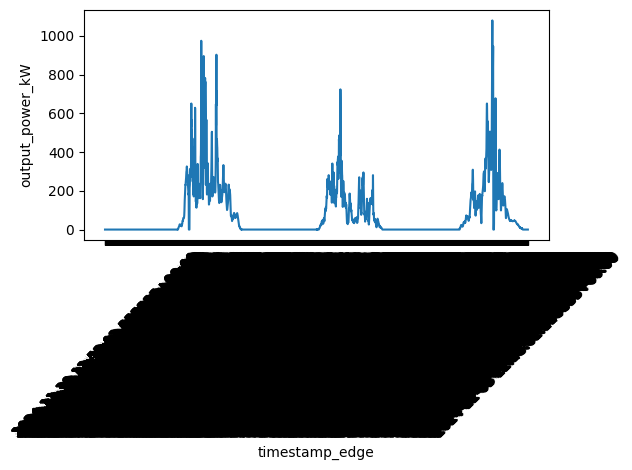

In [71]:
sns.lineplot(x='timestamp_edge', y='output_power_kW', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
df["context"] = pd.to_datetime(df['timestamp_edge']).dt.hour
df["next_context"] = df["context"].shift(-1)
df = df.drop(4297, axis=0, inplace=False)


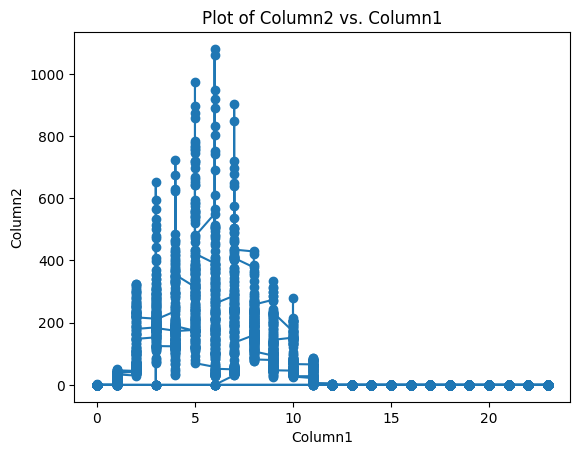

In [85]:
plt.plot(df['context'], df['output_power_kW'], marker='o', linestyle='-')  # marker='o' adds circles at data points

# Adding labels and title
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.title('Plot of Column2 vs. Column1')

plt.show()




0,12,13,14,15,16,17,18,19,20,21,22,23 are removed from the dataset because at that time system is not operating and it is zero with long term trend

In [21]:
l =[]
for i in range(len(df["context"])):
    if df["context"][i] not in [0,12,13,14,15,16,17,18,19,20,21,22,23]:
        l.append(i)
        break


In [22]:
l

[730]

In [23]:
for i in range(730,len(df["context"])):
    if df["context"][i] in [0,12,13,14,15,16,17,18,19,20,21,22,23]:
        l.append(i)
        break

In [24]:
l

[730, 1378]

indices of non zero values starting and ending: [(730,1377),(2157,2814),(3594,4248)]

In [25]:
index_ranges = [(730, 1377), (2157, 2814), (3594, 4248)]

# Select specific columns
columns_to_keep = ["context","next_context","output_power_kW"]

dfs = []
for start, end in index_ranges:
    filtered_df = df.loc[start:end, columns_to_keep]
    filtered_df = filtered_df.rename(columns={'output_power_kW':'target'})
    filtered_df["context"] = filtered_df["context"]/10
    filtered_df["next_context"] = filtered_df["next_context"]/10
    filtered_df["target"] = filtered_df["target"]/100
    dfs.append(filtered_df.reset_index(drop=True))


In [26]:
df1 = pd.concat([dfs[0], dfs[1], dfs[2]], axis=0, ignore_index=False).reset_index(drop=True)

df1

,context,next_context,target
0,0.1,0.1,0.00
1,0.1,0.1,0.00
2,0.1,0.1,0.00
3,0.1,0.1,0.00
4,0.1,0.1,0.01
...,...,...,...
1956,1.1,1.1,0.01
1957,1.1,1.1,0.00
1958,1.1,1.1,0.00
1959,1.1,1.1,0.00


from matplotlib import pyplot as plt
df1['context'].plot(kind='hist', bins=20, title='context')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['next_context'].plot(kind='hist', bins=20, title='next_context')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='context', y='next_context', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='next_context', y='target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['context'].plot(kind='line', figsize=(8, 4), title='context')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df1['next_context'].plot(kind='line', figsize=(8, 4), title='next_context')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df1['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

In [27]:
train = df1[:1561]
valid = df1[1561:1764]
test = df1[1764:]

In [28]:
test

,context,next_context,target
1764,0.8,0.8,1.58
1765,0.8,0.8,1.62
1766,0.8,0.8,1.64
1767,0.8,0.8,1.67
1768,0.8,0.8,1.69
...,...,...,...
1956,1.1,1.1,0.01
1957,1.1,1.1,0.00
1958,1.1,1.1,0.00
1959,1.1,1.1,0.00


from matplotlib import pyplot as plt
test['context'].plot(kind='hist', bins=20, title='context')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test['next_context'].plot(kind='hist', bins=20, title='next_context')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test.plot(kind='scatter', x='context', y='next_context', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test.plot(kind='scatter', x='next_context', y='target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['context']
  ys = series['target']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test.sort_values('context', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('context')
_ = plt.ylabel('target')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['context']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'context'}, axis=1)
              .sort_values('context', ascending=True))
  xs = counted['context']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test.sort_values('context', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('context')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['next_context']
  ys = series['target']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test.sort_values('next_context', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('next_context')
_ = plt.ylabel('target')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['next_context']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'next_context'}, axis=1)
              .sort_values('next_context', ascending=True))
  xs = counted['next_context']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test.sort_values('next_context', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('next_context')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
test['context'].plot(kind='line', figsize=(8, 4), title='context')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
test['next_context'].plot(kind='line', figsize=(8, 4), title='next_context')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
test['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

Dataset preparation

In [29]:
import tensorflow as tf

seq2vector

In [32]:
seq_length = 56
train_ds = tf.keras.utils.timeseries_dataset_from_array(
 train.to_numpy(), # use all 5 columns as input
 targets=train["target"][seq_length:], # forecast only the rail series
 sequence_length=seq_length,
 batch_size=32,
 shuffle=True,
 seed=42
)
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
 valid.to_numpy(),
 targets=valid["target"][seq_length:],
 sequence_length=seq_length,
 batch_size=32
)

In [33]:
model1 = tf.keras.Sequential([
 tf.keras.layers.SimpleRNN(32, input_shape=[None, 3]),
 tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
 monitor="val_mae", patience=50, restore_best_weights=True)
opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model1.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
history = model1.fit(train_ds, validation_data=valid_ds, epochs=500,
 callbacks=[early_stopping_cb])

Epoch 1/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1450 - mae: 0.3630 - val_loss: 0.4222 - val_mae: 0.7834
Epoch 2/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1197 - mae: 0.3591 - val_loss: 0.3104 - val_mae: 0.5927
Epoch 3/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0721 - mae: 0.2215 - val_loss: 0.2591 - val_mae: 0.4590
Epoch 4/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0607 - mae: 0.1744 - val_loss: 0.2524 - val_mae: 0.4309
Epoch 5/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0640 - mae: 0.1743 - val_loss: 0.2609 - val_mae: 0.4599
Epoch 6/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0582 - mae: 0.1868 - val_loss: 0.2538 - val_mae: 0.4418
Epoch 7/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0568 - mae: 0.1810 - val_loss: 0.2487 - val_mae: 0.4349
Epoch 8/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0637 - mae: 0.2039 - val_loss: 0.2457 - val_mae: 0.4249
Epoch 9/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - lo

In [37]:
# Prepare the test dataset
test_ds = tf.keras.utils.timeseries_dataset_from_array(
    test.to_numpy(),
    targets=test["target"][seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

# Evaluate the model on the test dataset
test_loss, test_mae = model1.evaluate(test_ds)
print(f"Test Loss (scaled): {test_loss}, Test MAE (scaled): {test_mae}")

# Predict on the test set
predictions = model1.predict(test_ds)

# Inverse scaling (multiply by 100 to return to original scale)
predictions_original_scale = predictions * 100

# Inverse scaling for actual targets (assuming the target column was scaled)
actual_targets_original_scale = test["target"][seq_length:] * 100

# Calculate MAE on the original scale
from sklearn.metrics import mean_absolute_error
mae_original_scale = mean_absolute_error(actual_targets_original_scale, predictions_original_scale)
print(f"Test MAE on original scale: {mae_original_scale}")

# Calculate R² score on the original scale
from sklearn.metrics import r2_score
r2_original_scale = r2_score(actual_targets_original_scale, predictions_original_scale)
print(f"Test R² on original scale: {r2_original_scale}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.9294e-04 - mae: 0.0205
Test Loss (scaled): 0.00043436166015453637, Test MAE (scaled): 0.02550029754638672
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Test MAE on original scale: 2.550031137804613
Test R² on original scale: 0.9682738537291566


In [39]:
model1.save_weights("model1.weights.h5")

seq2seq

In [40]:
def to_windows(dataset, length):
 dataset = dataset.window(length, shift=1, drop_remainder=True)
 return dataset.flat_map(lambda window_ds: window_ds.batch(length))
def to_seq2seq_dataset(series, seq_length=56, ahead=10, target_col=2,
 batch_size=32, shuffle=False, seed=None):
 ds = to_windows(tf.data.Dataset.from_tensor_slices(series), ahead + 1)
 ds = to_windows(ds, seq_length).map(lambda S: (S[:, 0], S[:, 1:, 2]))
 if shuffle:
  ds = ds.shuffle(8 * batch_size, seed=seed)
 return ds.batch(batch_size)

In [41]:
seq2seq_train = to_seq2seq_dataset(train, shuffle=True, seed=42)
seq2seq_valid = to_seq2seq_dataset(valid)

In [42]:
seq2seq_model = tf.keras.Sequential([
 tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, 3]),
 tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
 monitor="val_mae", patience=50, restore_best_weights=True)
opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
seq2seq_model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
history = seq2seq_model.fit(seq2seq_train, validation_data=seq2seq_valid, epochs=500,
 callbacks=[early_stopping_cb])

Epoch 1/500
     43/Unknown 2s 20ms/step - loss: 1.4199 - mae: 1.8228

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.3445 - mae: 1.7399 - val_loss: 1.1900 - val_mae: 1.6091
Epoch 2/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.3873 - mae: 0.6755 - val_loss: 1.1135 - val_mae: 1.5204
Epoch 3/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.3717 - mae: 0.6547 - val_loss: 1.0781 - val_mae: 1.4797
Epoch 4/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.3594 - mae: 0.6357 - val_loss: 1.0609 - val_mae: 1.4588
Epoch 5/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3513 - mae: 0.6233 - val_loss: 1.0652 - val_mae: 1.4621
Epoch 6/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.3474 - mae: 0.6187 - val_loss: 1.0647 - val_mae: 1.4607
Epoch 7/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.3561 - mae: 0.6256 - val_loss: 1.0614 - val_mae: 1.4545
Epoch 8/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3522 - mae: 0.6188 - val_loss: 1.0536 - val_mae: 1.4464
Epoch 9/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3420 -

In [44]:
X = test.to_numpy()[np.newaxis]
y_pred_10 = seq2seq_model.predict(X)[0][:,0]
y_pred = y_pred_10*100
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


array([213.0167   , 151.8483   , 167.4187   , 176.63635  , 175.86888  ,
       166.50664  , 173.32788  , 167.71585  , 168.18987  , 162.42096  ,
       160.95001  , 163.16815  , 155.93227  , 136.01413  , 138.76765  ,
       127.12733  , 123.807594 , 113.952324 ,  95.81169  ,  83.904076 ,
        64.815735 ,  56.780094 ,  63.461704 ,  68.89135  ,  78.0178   ,
        82.73382  ,  88.67936  ,  96.47485  , 106.65482  , 112.38358  ,
       114.53273  , 113.07818  , 110.8685   , 107.58684  , 105.14488  ,
       104.59357  , 101.82927  ,  99.55485  ,  96.03467  ,  93.03676  ,
        92.04627  ,  90.36049  ,  88.411156 ,  86.62512  ,  81.38025  ,
        80.8961   ,  77.29048  ,  76.17143  ,  74.29941  ,  72.32347  ,
        67.0422   ,  64.954025 ,  65.3233   ,  64.18222  ,  60.17785  ,
        60.64006  ,  57.66568  ,  57.59131  ,  55.09561  ,  54.52421  ,
        53.84813  ,  52.645622 ,  51.658047 ,  52.368103 ,  50.81161  ,
        53.082077 ,  52.353264 ,  52.321594 ,  54.2817   ,  51.5

In [45]:
(len(y_pred))

197

In [46]:
predictions_original_scale = y_pred[:195]

# Inverse scaling for actual targets (assuming the target column was scaled)
actual_targets_original_scale = test["target"][1:196] * 100

# Calculate MAE on the original scale
from sklearn.metrics import mean_absolute_error
mae_original_scale = mean_absolute_error(actual_targets_original_scale, predictions_original_scale)
print(f"Test MAE on original scale: {mae_original_scale}")

# Calculate R² score on the original scale
from sklearn.metrics import r2_score
r2_original_scale = r2_score(actual_targets_original_scale, predictions_original_scale)
print(f"Test R² on original scale: {r2_original_scale}")

Test MAE on original scale: 4.97774246044648
Test R² on original scale: 0.9761708124406997


In [47]:
seq2seq_model.save_weights("seq2seq_model.weights.h5")

using lstms, as we are not using attention we are using less seq length, but for our data it is linear spikes so, attention helps less with lstms

In [48]:
lstm = tf.keras.Sequential([
 tf.keras.layers.LSTM(32, return_sequences=True, input_shape=[None, 3]),
 tf.keras.layers.Dense(10)
])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
 monitor="val_mae", patience=50, restore_best_weights=True)
opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
lstm.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
history = lstm.fit(seq2seq_train, validation_data=seq2seq_valid, epochs=500,
 callbacks=[early_stopping_cb])

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


     47/Unknown 3s 38ms/step - loss: 1.2399 - mae: 1.6468

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 1.2276 - mae: 1.6333 - val_loss: 1.4401 - val_mae: 1.8840
Epoch 2/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.4644 - mae: 0.7705 - val_loss: 1.2232 - val_mae: 1.6532
Epoch 3/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.4062 - mae: 0.7020 - val_loss: 1.1682 - val_mae: 1.5899
Epoch 4/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3893 - mae: 0.6749 - val_loss: 1.1541 - val_mae: 1.5727
Epoch 5/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3738 - mae: 0.6534 - val_loss: 1.1326 - val_mae: 1.5482
Epoch 6/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3778 - mae: 0.6565 - val_loss: 1.1221 - val_mae: 1.5351
Epoch 7/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3637 - mae: 0.6378 - val_loss: 1.1186 - val_mae: 1.5293
Epoch 8/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3609 - mae: 0.6353 - val_loss: 1.1063 - val_mae: 1.5151
Epoch 9/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.3640 -

In [49]:
X = test.to_numpy()[np.newaxis]
y_pred_10 = lstm.predict(X)[0][:,0]
y_pred = y_pred_10*100
predictions_original_scale = y_pred[:195]

# Inverse scaling for actual targets (assuming the target column was scaled)
actual_targets_original_scale = test["target"][1:196] * 100

# Calculate MAE on the original scale
from sklearn.metrics import mean_absolute_error
mae_original_scale = mean_absolute_error(actual_targets_original_scale, predictions_original_scale)
print(f"Test MAE on original scale: {mae_original_scale}")

# Calculate R² score on the original scale
from sklearn.metrics import r2_score
r2_original_scale = r2_score(actual_targets_original_scale, predictions_original_scale)
print(f"Test R² on original scale: {r2_original_scale}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Test MAE on original scale: 3.3982152400872647
Test R² on original scale: 0.9823860561800698


In [50]:
y_pred

array([202.73347  , 160.46494  , 148.82745  , 166.25769  , 169.27765  ,
       169.0315   , 167.8914   , 166.59659  , 159.8517   , 157.03546  ,
       153.82088  , 149.56305  , 143.03044  , 128.70694  , 126.40885  ,
       119.94731  , 114.31055  , 106.73952  ,  90.63803  ,  72.378426 ,
        60.33405  ,  55.694496 ,  57.271217 ,  61.23184  ,  69.2965   ,
        71.86793  ,  76.11021  ,  80.290504 ,  87.12095  ,  92.6584   ,
        94.377556 ,  92.843544 ,  91.75527  ,  88.59068  ,  88.01083  ,
        89.4821   ,  87.59736  ,  85.15947  ,  81.01508  ,  77.0966   ,
        74.53879  ,  71.7709   ,  69.13484  ,  66.95267  ,  62.772846 ,
        62.73594  ,  61.345695 ,  61.581673 ,  61.456062 ,  60.996044 ,
        57.573925 ,  56.173695 ,  57.205963 ,  57.079624 ,  53.680485 ,
        53.42176  ,  51.58895  ,  51.06429  ,  49.117    ,  48.5942   ,
        47.997154 ,  47.246857 ,  46.427376 ,  46.843365 ,  45.76587  ,
        47.181255 ,  47.087967 ,  46.793766 ,  47.862236 ,  46.2

In [51]:
lstm.save_weights("lstm.weights.h5")

since, the data is of only 4 days and all temperature and grid connections are very near there is no drift in data